In [1]:
# import packages that will be used for the logistics regression analysis
import pylab
import seaborn as sb
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.core.display import HTML
from IPython.display import display
import pandas as pd
from pandas import Series, DataFrame
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [5]:
# import data set that will be used for the logistics regression analysis
pd.set_option('display.max_columns', None)
df = pd.read_csv (r'C:\Users\fahim\Documents\0_WGUDocuments\d208\1medical_clean.csv')

In [4]:
# check if there is any missing data entries. Output should be false.
df.isna().any()

CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
TimeZone              False
Job                   False
Children              False
Age                   False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis   

In [6]:
# drop all the columns we don't need for this analysis
df.drop(['Item8','Item7','Item6','Item5','Item4','Item3','Item2','Item1','City','State','County','Area','Zip','Lat','Lng','Population','TimeZone','Additional_charges','TotalCharge','Services','Interaction','UID','Customer_id','Job','CaseOrder','Marital','VitD_levels','Full_meals_eaten','vitD_supp','Soft_drink'],axis = 1,inplace=True)
# verify that all the columns were dropped before proceeding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Gender              10000 non-null  object 
 4   ReAdmis             10000 non-null  object 
 5   Doc_visits          10000 non-null  int64  
 6   Initial_admin       10000 non-null  object 
 7   HighBlood           10000 non-null  object 
 8   Stroke              10000 non-null  object 
 9   Complication_risk   10000 non-null  object 
 10  Overweight          10000 non-null  object 
 11  Arthritis           10000 non-null  object 
 12  Diabetes            10000 non-null  object 
 13  Hyperlipidemia      10000 non-null  object 
 14  BackPain            10000 non-null  object 
 15  Anxiety             10000 non-null  object 
 16  Aller

In [7]:
df.describe()

,Children,Age,Income,Doc_visits,Initial_days
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.097200,53.511700,40490.495160,5.012200,34.455299
std,2.163659,20.638538,28521.153293,1.045734,26.309341
min,0.000000,18.000000,154.080000,1.000000,1.001981
25%,0.000000,36.000000,19598.775000,4.000000,7.896215
50%,1.000000,53.000000,33768.420000,5.000000,35.836244
75%,3.000000,71.000000,54296.402500,6.000000,61.161020
max,10.000000,89.000000,207249.100000,9.000000,71.981490


In [8]:
#Create dummies for Gender and the target variable 
df['gender_dummy'] = [1 if v == 'Female' else 0 for v in df['Gender']]
df['ReAdmis_dummy'] = [1 if v == 'Yes' else 0 for v in df['ReAdmis']]

In [9]:
print(df)

      Children  Age    Income  Gender ReAdmis  Doc_visits  \
0            1   53  86575.93    Male      No           6   
1            3   51  46805.99  Female      No           4   
2            3   53  14370.14  Female      No           4   
3            0   78  39741.49    Male      No           4   
4            1   22   1209.56  Female      No           5   
...        ...  ...       ...     ...     ...         ...   
9995         2   25  45967.61    Male      No           4   
9996         4   87  14983.02    Male     Yes           5   
9997         3   45  65917.81  Female     Yes           4   
9998         3   43  29702.32    Male     Yes           5   
9999         8   70  62682.63  Female     Yes           5   

              Initial_admin HighBlood Stroke Complication_risk Overweight  \
0       Emergency Admission       Yes     No            Medium         No   
1       Emergency Admission       Yes     No              High        Yes   
2        Elective Admission       Ye

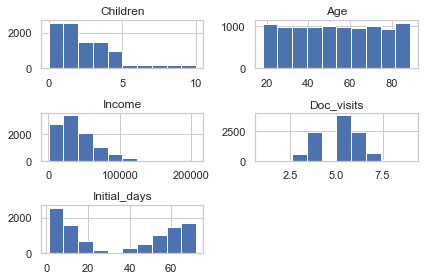

In [10]:
# showcase the univariate distributions
df[['Children','Age','Income','Doc_visits','Initial_days']].hist()
plt.tight_layout()

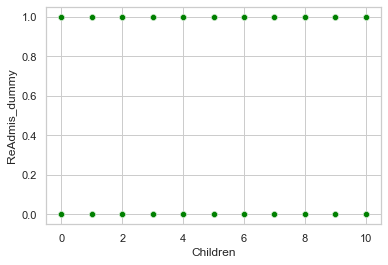

In [11]:
# showcase the bivariate distributions through scatterplots
sb.scatterplot(x=df['Children'], y=df['ReAdmis_dummy'], color='green')
plt.show();

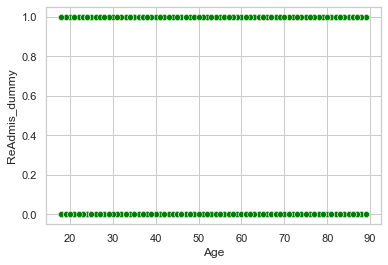

In [12]:
sb.scatterplot(x=df['Age'], y=df['ReAdmis_dummy'], color='green')
plt.show();

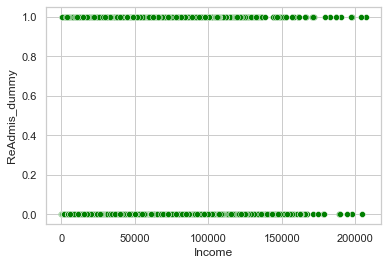

In [13]:
sb.scatterplot(x=df['Income'], y=df['ReAdmis_dummy'], color='green')
plt.show();

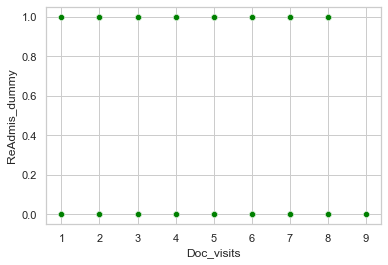

In [14]:
sb.scatterplot(x=df['Doc_visits'], y=df['ReAdmis_dummy'], color='green')
plt.show();

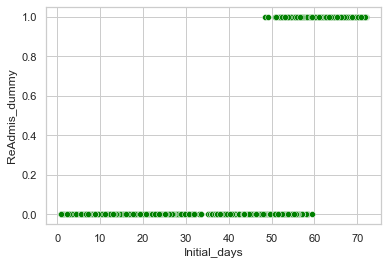

In [15]:
sb.scatterplot(x=df['Initial_days'], y=df['ReAdmis_dummy'], color='green')
plt.show();

In [16]:
# create the initial logistics model
df['Intercept'] = 1
log_reg_results = sm.Logit(df["ReAdmis_dummy"], df[['Children','Age','Income','Doc_visits','Initial_days','gender_dummy','Intercept']]).fit()
print(log_reg_results.summary())

Optimization terminated successfully.
         Current function value: 0.048760
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:          ReAdmis_dummy   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Sun, 11 Dec 2022   Pseudo R-squ.:                  0.9258
Time:                        19:20:16   Log-Likelihood:                -487.60
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Children         0.0619      0.037      1.675      0.094      -0.011       0.134
Age             -0.000

In [17]:
# create the reduced logistics model
df['Intercept'] = 1
log_reg_results2 = sm.Logit(df["ReAdmis_dummy"], df[['Children','Initial_days','gender_dummy','Intercept']]).fit()
print(log_reg_results2.summary())

Optimization terminated successfully.
         Current function value: 0.048770
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:          ReAdmis_dummy   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sun, 11 Dec 2022   Pseudo R-squ.:                  0.9258
Time:                        19:20:23   Log-Likelihood:                -487.70
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Children         0.0615      0.037      1.668      0.095      -0.011       0.134
Initial_days     0.988

In [18]:
# create the data frame for the correlation matrix
df.to_csv(r'C:\Users\fahim\Documents\0_WGUDocuments\d208\d208_task2_data.csv')

In [19]:
# create the data frame for the correlation matrix (cont.)
newdf = pd.read_csv(r'C:\Users\fahim\Documents\0_WGUDocuments\d208\d208_task2_data.csv')
print(newdf)

      Unnamed: 0  Children  Age    Income  Gender ReAdmis  Doc_visits  \
0              0         1   53  86575.93    Male      No           6   
1              1         3   51  46805.99  Female      No           4   
2              2         3   53  14370.14  Female      No           4   
3              3         0   78  39741.49    Male      No           4   
4              4         1   22   1209.56  Female      No           5   
...          ...       ...  ...       ...     ...     ...         ...   
9995        9995         2   25  45967.61    Male      No           4   
9996        9996         4   87  14983.02    Male     Yes           5   
9997        9997         3   45  65917.81  Female     Yes           4   
9998        9998         3   43  29702.32    Male     Yes           5   
9999        9999         8   70  62682.63  Female     Yes           5   

              Initial_admin HighBlood Stroke Complication_risk Overweight  \
0       Emergency Admission       Yes     No  

In [28]:
# create the correlation matrix
matrix_df = pd.read_csv(r'C:\Users\fahim\Documents\0_WGUDocuments\d208\d208_task2_data.csv')

matrix_df = matrix_df[['Children','Age','Income','Doc_visits','Initial_days','gender_dummy','Intercept', "ReAdmis_dummy"]]

X = matrix_df.iloc[:, 1:-1].values
y = matrix_df.iloc[:,-1].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, Xtest, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets